In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb
import deep_gravity_utils as dgu

# Deep Gravity 

In [2]:
big_res_df1 = pd.DataFrame(columns=['cpc', 'nrmse', 'nmae', 'smape'])

In [3]:
OD = np.load('./data/3d_daily.npy').sum(axis=2)[:48, :48]
OD_max = OD.max(axis=1).reshape(-1, 1)
OD_max_pred = OD_max[-14:]

labels = np.load('./res/dg and g/labels.npy')[-14*48:]
labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

for i in range(25):
    run = i + 1
    path = './runs/run%i/'%run
    pred_run = np.load(path+'pred.npy')[-14*48:]
    pred_run = (pred_run.reshape(14, 48) * OD_max_pred).reshape(-1, 1)
    cpc = dgu.get_CPC(pred_run, labels)
    nrmse = dgu.nrmse_loss_func(pred_run, labels, 0)
    nmae = dgu.nmae_loss_func(pred_run, labels, 0)
    smape = dgu.smape_loss_func(pred_run, labels, 0)
    big_res_df1.loc[run, :] = [cpc, nrmse, nmae, smape]
    

In [4]:
big_res_df1.loc['mean', :] = big_res_df1.mean().values
big_res_df1.loc['std', :] = big_res_df1.std().values

big_res_df1.to_csv('./res/dg and g/results_dg_25_runs.csv')
big_res_df1.loc[['mean', 'std']]

,cpc,nrmse,nmae,smape
mean,0.720738,0.082664,0.046568,0.8104
std,0.011871,0.006683,0.002467,0.026095


In [5]:
OD = np.load('./data/3d_daily.npy').sum(axis=2)[:48, :48]
OD_max = OD.max(axis=1).reshape(-1, 1)
OD_max_pred = OD_max[-14:]

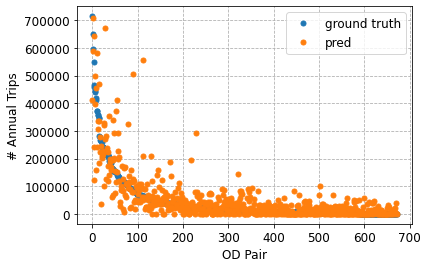

In [11]:
run = 11
path = './runs/run%i/'%run
pred = np.load(path+'pred.npy')[-14*48:]
labels = np.load('./res/dg and g/labels.npy')[-14*48:]

pred = (pred.reshape(14, 48) * OD_max_pred).reshape(-1, 1)
labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

labels_df = pd.DataFrame(labels).sort_values(by=0, ascending=False)
l_ind = labels_df.index
labels_df.index = range(labels_df.shape[0])
pred_df = pd.DataFrame(pred).loc[l_ind]
pred_df.index = range(pred_df.shape[0])

fig_res = plt.figure()
ax0 = fig_res.add_subplot(1, 1, 1)
ax0.plot(labels_df[0], '.', label='ground truth', ms=10)
ax0.plot(pred_df[0], '.', label='pred', ms=10)
ax0.set_xlabel('OD Pair', fontsize=12)
ax0.set_ylabel('# Annual Trips', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls='--')

In [13]:
m = 0.0

print('The mae loss is %.4f'%dgu.mae_loss_func(pred, labels, m))
print('The mape loss is %.4f'%dgu.mape_loss_func(pred, labels, m))
print('The smape loss is %.4f'%dgu.smape_loss_func(pred, labels, m))
print('The nrmse loss is %.4f'%dgu.nrmse_loss_func(pred, labels, m))
print('The nmae loss is %.4f'%dgu.nmae_loss_func(pred, labels, m))
print('The CPC is %.4f'%dgu.get_CPC(pred, labels))

The mae loss is 32711.9884
The mape loss is 4.7522
The smape loss is 0.8279
The nrmse loss is 0.0875
The nmae loss is 0.0458
The CPC is 0.7160


/Users/kaihangzhang/Downloads/GitHub/BART_Ridership_Prediction/deep_gravity_utils.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


# Gravity

In [14]:
g_pred_df = pd.read_csv('./res/dg and g/g_pred.csv', index_col=0)
g_pred = g_pred_df['0'].values[-14*48:].reshape(-1, 1)
g_pred.shape

(672, 1)

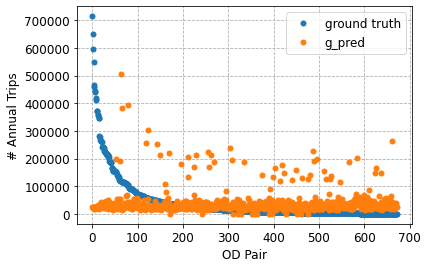

In [15]:
labels = np.load('./res/dg and g/labels.npy')[-14*48:]

labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

labels_df = pd.DataFrame(labels).sort_values(by=0, ascending=False)
l_ind = labels_df.index
labels_df.index = range(labels_df.shape[0])
g_pred_df = pd.DataFrame(g_pred).loc[l_ind]
g_pred_df.index = range(g_pred_df.shape[0])

fig_res = plt.figure()
ax0 = fig_res.add_subplot(1, 1, 1)
ax0.plot(labels_df[0], '.', label='ground truth', ms=10)
ax0.plot(g_pred_df[0], '.', label='g_pred', ms=10)
ax0.set_xlabel('OD Pair', fontsize=12)
ax0.set_ylabel('# Annual Trips', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls='--')

In [16]:
m = 0.0

print('The mae loss is %.4f'%dgu.mae_loss_func(g_pred, labels, m))
print('The mape loss is %.4f'%dgu.mape_loss_func(g_pred, labels, m))
print('The smape loss is %.4f'%dgu.smape_loss_func(g_pred, labels, m))
print('The nrmse loss is %.4f'%dgu.nrmse_loss_func(g_pred, labels, m))
print('The nmae loss is %.4f'%dgu.nmae_loss_func(g_pred, labels, m))
print('The CPC is %.4f'%dgu.get_CPC(g_pred, labels))

The mae loss is 55596.9690
The mape loss is 17.3799
The smape loss is 1.1917
The nrmse loss is 0.1396
The nmae loss is 0.0778
The CPC is 0.3505


# Two models in one graph

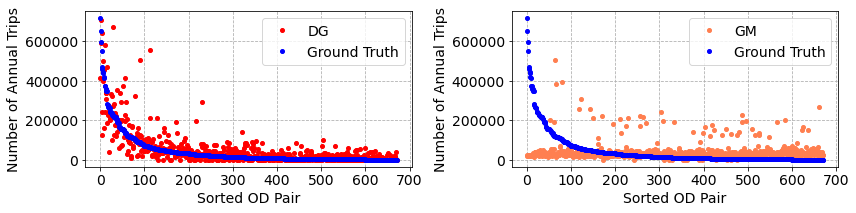

In [18]:
run = 11
path = './runs/run%i/'%run
pred = np.load(path+'pred.npy')[-14*48:]
labels = np.load('./res/dg and g/labels.npy')[-14*48:]

pred = (pred.reshape(14, 48) * OD_max_pred).reshape(-1, 1)
labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

labels_df = pd.DataFrame(labels).sort_values(by=0, ascending=False)
l_ind = labels_df.index
labels_df.index = range(labels_df.shape[0])
g_pred_df = pd.DataFrame(g_pred).loc[l_ind]
g_pred_df.index = range(g_pred_df.shape[0])
pred_df = pd.DataFrame(pred).loc[l_ind]
pred_df.index = range(pred_df.shape[0])

ms = 8
fs = 14
fig_res = plt.figure(figsize=[12, 3])
ax0 = fig_res.add_subplot(1, 2, 1)
ax0.plot(pred_df[0], '.', label='DG', ms=ms, c='red')
ax0.plot(labels_df[0], '.', label='Ground Truth', ms=ms, c='blue')
ax0.set_xlabel('Sorted OD Pair', fontsize=fs)
ax0.set_ylabel('Number of Annual Trips', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax0.legend(fontsize=fs)
ax0.grid(ls='--')

ax1 = fig_res.add_subplot(1, 2, 2)
ax1.plot(g_pred_df[0], '.', label='GM', ms=ms, c='coral')
ax1.plot(labels_df[0], '.', label='Ground Truth', ms=ms, c='blue')
ax1.set_xlabel('Sorted OD Pair', fontsize=fs)
ax1.set_ylabel('Number of Annual Trips', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax1.legend(fontsize=fs)
ax1.grid(ls='--')

plt.tight_layout()
fig_res.savefig('./res/dg and g/res.png', dpi=500)

# Spatial Visualization

In [58]:
import geopandas as gpd

In [59]:
data_X_all = gpd.read_file('./data/data_X_all.shp')
stops = pd.read_csv('./data/stops_order.csv', index_col=0).iloc[:48, :]

In [60]:
data_X_all.head(2)

,GEOID,INTPTLAT,INTPTLON,TotPop,CSA,CSA_Name,CBSA,CBSA_Name,AutoOwn0,AutoOwn1,...,D4C,D4D,D5AR,D5AE,NatWalkInd,COUNTYID,if_keep,nearest st,transit di,geometry
0,06001983200,37.804224,-122.27715,11084.0,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,"San Francisco-Oakland-Berkeley, CA",1664.0,2208.0,...,71.028333,707.012491,1891149.0,1455141.0,16.972222,06001,1.0,12TH,0.895287,"POLYGON ((-122.28374 37.79480, -122.28343 37.7..."
1,06075020500,37.769279,-122.43602,142973.0,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,"San Francisco-Oakland-Berkeley, CA",20505.0,29075.0,...,30.318892,697.115918,16339411.0,11103193.0,16.600806,06075,1.0,16TH,2.424009,"POLYGON ((-122.43467 37.75611, -122.43564 37.7..."


In [61]:
bart_coor = pd.read_csv('./data/station-coor.csv', index_col=0)
bart_coor.head(2)

,abbr,lat,lon
0,12TH,37.803768,-122.271450
1,16TH,37.765062,-122.419694


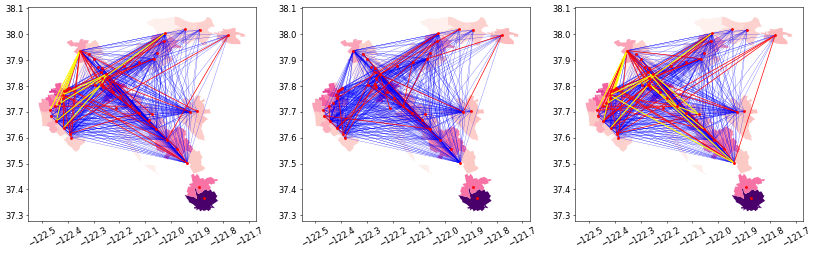

In [64]:
fs = 12

fig = plt.figure(figsize=[20, 10], dpi=50)
ax0 = fig.add_subplot(133)
plt.xticks(rotation=30, fontsize=fs)
plt.yticks(fontsize=fs)
# ax0.set_title('DG Generation')
ax1 = fig.add_subplot(131)
plt.xticks(rotation=30, fontsize=fs)
plt.yticks(fontsize=fs)
# ax1.set_title('Ground Truth')
ax2 = fig.add_subplot(132)
plt.xticks(rotation=30, fontsize=fs)
plt.yticks(fontsize=fs)
# ax2.set_title('GM Generation')

data_X_all.plot(column='TotPop', ax=ax0, cmap='RdPu')
data_X_all.plot(column='TotPop', ax=ax1, cmap='RdPu')
data_X_all.plot(column='TotPop', ax=ax2, cmap='RdPu')

# plot trips
num_pred_stations = pred.shape[0] // 50  # 50 means that there are 50 stations in total
pred_stations = stops.iloc[-num_pred_stations:, 0]

low_lon_pred_dest = []
low_lat_pred_dest = []
mid_lon_pred_dest = []
mid_lat_pred_dest = []
high_lon_pred_dest = []
high_lat_pred_dest = []
low_lon_pred_origin = []
low_lat_pred_origin = []
mid_lon_pred_origin = []
mid_lat_pred_origin = []
high_lon_pred_origin = []
high_lat_pred_origin = []

low_lon_g_pred_dest = []
low_lat_g_pred_dest = []
mid_lon_g_pred_dest = []
mid_lat_g_pred_dest = []
high_lon_g_pred_dest = []
high_lat_g_pred_dest = []
low_lon_g_pred_origin = []
low_lat_g_pred_origin = []
mid_lon_g_pred_origin = []
mid_lat_g_pred_origin = []
high_lon_g_pred_origin = []
high_lat_g_pred_origin = []

low_lon_labels_dest = []
low_lat_labels_dest = []
mid_lon_labels_dest = []
mid_lat_labels_dest = []
high_lon_labels_dest = []
high_lat_labels_dest = []
low_lon_labels_origin = []
low_lat_labels_origin = []
mid_lon_labels_origin = []
mid_lat_labels_origin = []
high_lon_labels_origin = []
high_lat_labels_origin = []

for i in pred_stations.index:
    station_dest = pred_stations.loc[i]
    for j in stops.index:
        station_origin = stops.loc[j, 'stop']
        
        lon_origin = bart_coor.loc[bart_coor['abbr']==station_origin, 'lon'].values[0]
        lat_origin = bart_coor.loc[bart_coor['abbr']==station_origin, 'lat'].values[0]
        lon_dest = bart_coor.loc[bart_coor['abbr']==station_dest, 'lon'].values[0]
        lat_dest = bart_coor.loc[bart_coor['abbr']==station_dest, 'lat'].values[0]
        
        dest_ind = i-34
        origin_ind = j+1
        trip_ind = dest_ind*origin_ind - 1
        
        if pred[trip_ind]<0.3*labels.max():
            low_lon_pred_dest.append(lon_dest)
            low_lat_pred_dest.append(lat_dest)
            low_lon_pred_origin.append(lon_origin)
            low_lat_pred_origin.append(lat_origin)
#             ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'b', lw=0.1)
        elif pred[trip_ind]>=0.3*labels.max() and pred[trip_ind]<0.6*labels.max():
            mid_lon_pred_dest.append(lon_dest)
            mid_lat_pred_dest.append(lat_dest)
            mid_lon_pred_origin.append(lon_origin)
            mid_lat_pred_origin.append(lat_origin)
#             ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'red', lw=0.6*labels.max())
        elif pred[trip_ind]>=0.6*labels.max():
            high_lon_pred_dest.append(lon_dest)
            high_lat_pred_dest.append(lat_dest)
            high_lon_pred_origin.append(lon_origin)
            high_lat_pred_origin.append(lat_origin)
#             ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'yellow', lw=2)
        
        if g_pred[trip_ind]<0.3*labels.max():
            low_lon_g_pred_dest.append(lon_dest)
            low_lat_g_pred_dest.append(lat_dest)
            low_lon_g_pred_origin.append(lon_origin)
            low_lat_g_pred_origin.append(lat_origin)
#             ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'b', lw=0.1)
        elif g_pred[trip_ind]>=0.3*labels.max() and pred[trip_ind]<0.6*labels.max():
            mid_lon_g_pred_dest.append(lon_dest)
            mid_lat_g_pred_dest.append(lat_dest)
            mid_lon_g_pred_origin.append(lon_origin)
            mid_lat_g_pred_origin.append(lat_origin)
#             ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'red', lw=0.6*labels.max())
        elif g_pred[trip_ind]>=0.6*labels.max():
            high_lon_g_pred_dest.append(lon_dest)
            high_lat_g_pred_dest.append(lat_dest)
            high_lon_g_pred_origin.append(lon_origin)
            high_lat_g_pred_origin.append(lat_origin)
#             ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'yellow', lw=2)
        
        if labels[trip_ind]<0.3*labels.max():
            low_lon_labels_dest.append(lon_dest)
            low_lat_labels_dest.append(lat_dest)
            low_lon_labels_origin.append(lon_origin)
            low_lat_labels_origin.append(lat_origin)
#             ax1.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'b', lw=0.1)
        elif labels[trip_ind]>=0.3*labels.max() and labels[trip_ind]<0.6*labels.max():
            mid_lon_labels_dest.append(lon_dest)
            mid_lat_labels_dest.append(lat_dest)
            mid_lon_labels_origin.append(lon_origin)
            mid_lat_labels_origin.append(lat_origin)
#             ax1.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'red', lw=0.6*labels.max())
        elif labels[trip_ind]>=0.6*labels.max():
            high_lon_labels_dest.append(lon_dest)
            high_lat_labels_dest.append(lat_dest)
            high_lon_labels_origin.append(lon_origin)
            high_lat_labels_origin.append(lat_origin)
#             ax1.plot([lon_origin, lon_dest], [lat_origin, lat_dest], 'yellow', lw=2)

# dg pred
for i in range(len(low_lon_pred_dest)):
    ax0.plot([low_lon_pred_origin[i], low_lon_pred_dest[i]], [low_lat_pred_origin[i], low_lat_pred_dest[i]], 'b', lw=0.3)
    
for i in range(len(mid_lon_pred_dest)):
    ax0.plot([mid_lon_pred_origin[i], mid_lon_pred_dest[i]], [mid_lat_pred_origin[i], mid_lat_pred_dest[i]], 'red', lw=1)
    
for i in range(len(high_lon_pred_dest)):
    ax0.plot([high_lon_pred_origin[i], high_lon_pred_dest[i]], [high_lat_pred_origin[i], high_lat_pred_dest[i]], 'yellow', lw=1.5)

# gm pred
for i in range(len(low_lon_g_pred_dest)):
    ax2.plot([low_lon_g_pred_origin[i], low_lon_g_pred_dest[i]], [low_lat_g_pred_origin[i], low_lat_g_pred_dest[i]], 'b', lw=0.3)
    
for i in range(len(mid_lon_g_pred_dest)):
    ax2.plot([mid_lon_g_pred_origin[i], mid_lon_g_pred_dest[i]], [mid_lat_g_pred_origin[i], mid_lat_g_pred_dest[i]], 'red', lw=1)
    
for i in range(len(high_lon_g_pred_dest)):
    ax2.plot([high_lon_g_pred_origin[i], high_lon_g_pred_dest[i]], [high_lat_g_pred_origin[i], high_lat_g_pred_dest[i]], 'yellow', lw=1.5)

# labels
for i in range(len(low_lon_labels_dest)):
    ax1.plot([low_lon_labels_origin[i], low_lon_labels_dest[i]], [low_lat_labels_origin[i], low_lat_labels_dest[i]], 'b', lw=0.3)
    
for i in range(len(mid_lon_labels_dest)):
    ax1.plot([mid_lon_labels_origin[i], mid_lon_labels_dest[i]], [mid_lat_labels_origin[i], mid_lat_labels_dest[i]], 'red', lw=1)
    
for i in range(len(high_lon_labels_dest)):
    ax1.plot([high_lon_labels_origin[i], high_lon_labels_dest[i]], [high_lat_labels_origin[i], high_lat_labels_dest[i]], 'yellow', lw=1.5)



# plot stations
for i in bart_coor.index:
    lon = bart_coor.loc[i, 'lon']
    lat = bart_coor.loc[i, 'lat']
    ax0.plot(lon, lat, 'r.')
    ax1.plot(lon, lat, 'r.')
    ax2.plot(lon, lat, 'r.')

